# Styling

As usual, we initialize ITables with `init_notebook_mode`, and we create two sample DataFrames:


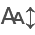

In [1]:
import pandas as pd

import itables.options as opt
from itables import init_notebook_mode, show
from itables.sample_dfs import get_countries

df = get_countries(html=False)
df_small = pd.DataFrame({"a": [2, 1]})

init_notebook_mode(all_interactive=True)

## Classes

Select how your table looks like with the `classes` argument (defaults to `"display nowrap"`) of the `show` function, or by changing `itables.options.classes`.

Add `"compact"` if you want a denser table:

In [2]:
show(df, classes="display nowrap compact")

Remove `"nowrap"` if you want the cell content to be wrapped:

In [3]:
show(df, classes="display")

[More options](https://datatables.net/manual/styling/classes#Table-classes) like `"cell-border"` are available:

In [4]:
show(df, classes="display nowrap cell-border")

## CSS

You can use CSS to alter how the interactive DataTables are rendered.

For instance, we change the
[font size](https://developer.mozilla.org/en-US/docs/Web/CSS/font-size)
for all the tables in the document with this code:

In [5]:
from IPython.display import HTML, display

css = """
.dt-container {
  font-size: small;
}
"""
display(HTML(f"<style>{css}</style>" ""))

This is helpful for instance in the context of
[Quarto presentations](quarto.md).

With this over CSS, we change _every datatable_ table header
in the notebook to bold/italic.

In [6]:
css = """
.dataTable th {
    font-weight: bolder;
    font-style: italic;
}
"""
display(HTML(f"<style>{css}</style>" ""))

You might also want to alter the style of specific tables only.
To do this, add a new class to the target tables, as
in the example below:

In [7]:
class_specific_css = ".table_with_monospace_font { font-family: courier, monospace }"
display(HTML(f"<style>{class_specific_css}</style>" ""))

In [8]:
show(df, classes="display nowrap table_with_monospace_font")

(style)=
## The style argument

The `show` function has a `style` argument that determines the
style for that particular table.

The default value for `style` is `table-layout:auto;width:auto;margin:auto;caption-side:bottom`.
Without `width:auto`, tables with few columns still take the full notebook width in Jupyter.
Using `margin:auto` makes non-wide tables centered in Jupyter.

## Position and width

You can set a specific width or position for a table using with the `style` argument of the show function:

In [9]:
show(df_small, style="table-layout:auto;width:50%;float:right")

or you can also change it for all tables by changing `itables.options.style`:

```python
import itables.options as opt

opt.style = "table-layout:auto;width:auto"
```

```{tip}
For ajusting the height of a table, see the section on [pagination](advanced_parameters.md#pagination).
```

## Column width

The [`columnDefs.width`](https://datatables.net/reference/option/columns.width) argument let you adjust the column widths.

Note that the default value of `style`, or of `autoWidth` (defaults to `True`), might override custom column widths,
so you might have to change their values as in the examples below.

You can set a fixed width for all the columns with `"targets": "_all"`:

In [10]:
show(
    df,
    columnDefs=[{"width": "120px", "targets": "_all"}],
    scrollX=True,
    style="width:1200px",
    autoWidth=False,
)

You can also adjust the width of selected columns only:

In [11]:
show(
    df,
    columnDefs=[{"width": "30%", "targets": [2, 3]}],
    style="width:100%;margin:auto",
)

If you wish you can also set a value for `columnDefs` permanently in `itables.options` as demonstrated in the cell alignment example below.

## Cell alignment

You can use the DataTables [cell classes](https://datatables.net/manual/styling/classes#Cell-classes) like `dt-left`, `dt-center`, `dt-right` etc. to set the cell alignment. Specify it for one table by using the `columnDefs` argument of `show`

In [12]:
show(df, columnDefs=[{"className": "dt-center", "targets": "_all"}])

or globally by setting `opt.columnDefs`:

In [13]:
opt.columnDefs = [{"className": "dt-center", "targets": "_all"}]
df

region       country           capital  longitude  \
code                                                                          
AW    Latin America & Caribbean          Aruba        Oranjestad   -70.0167   
AF                    South Asia   Afghanistan             Kabul    69.1761   
AO           Sub-Saharan Africa         Angola            Luanda    13.2420   
AL         Europe & Central Asia       Albania            Tirane    19.8172   
AD         Europe & Central Asia       Andorra  Andorra la Vella     1.5218   
...                          ...           ...               ...        ...   
XK         Europe & Central Asia        Kosovo          Pristina    20.9260   
YE    Middle East & North Africa   Yemen, Rep.            Sana'a    44.2075   
ZA           Sub-Saharan Africa   South Africa          Pretoria    28.1871   
ZM           Sub-Saharan Africa         Zambia            Lusaka    28.2937   
ZW           Sub-Saharan Africa       Zimbabwe            Harare    31.0672   

      latitude  
code            
AW    12.51670  
AF    34.52280  
AO    -8.81155  
AL    41.33170  
AD    42.50750  
...        ...  
XK    42.56500  
YE    15.35200  
ZA   -25.74600  
ZM   -15.39820  
ZW   -17.83120  

[208 rows x 5 columns]